In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the generated COVID-19 data
data = pd.read_csv('covid19_sample_data.csv')

# Convert the 'DateTested' column to datetime format
data['DateTested'] = pd.to_datetime(data['DateTested'])

# Display the first few rows of the dataframe
print(data.head())



                              PatientID  Age  Gender  \
0  4ed8c3e8-7f34-4035-bfd8-722ada31a4f1   37   Other   
1  7c955579-cffe-40b1-bbd7-2e09e64a6738   59   Other   
2  bf147208-a9b8-44d1-a543-02d27e51bef1   74    Male   
3  85e8b0f8-b7f9-4fe4-a872-d63b976293ab   96    Male   
4  4de243af-3a38-4bb7-a5e6-f08068716e87   14  Female   

                                     Symptoms TestResult  Hospitalized  \
0                        Loss of smell, Cough   Positive          True   
1          Shortness of breath, Loss of smell   Positive         False   
2  Fever, Shortness of breath, Fatigue, Cough   Negative          True   
3                                     Fatigue   Positive         False   
4                                       Fever   Positive         False   

   Recovered DateTested  
0       True 2020-03-11  
1      False 2022-12-11  
2      False 2023-06-18  
3       True 2021-05-22  
4      False 2020-08-27  


In [2]:
# Basic Statistics
print("\nBasic Statistics:\n")
print(data.describe(include='all'))

# Gender Distribution
gender_distribution = data['Gender'].value_counts()
print("\nGender Distribution:\n", gender_distribution)




Basic Statistics:

                                   PatientID          Age  Gender  \
count                                   1000  1000.000000    1000   
unique                                  1000          NaN       3   
top     055b3ff7-35ad-4d71-ab8a-6e9cfb06790a          NaN  Female   
freq                                       1          NaN     344   
first                                    NaN          NaN     NaN   
last                                     NaN          NaN     NaN   
mean                                     NaN    48.530000     NaN   
std                                      NaN    29.162468     NaN   
min                                      NaN     0.000000     NaN   
25%                                      NaN    22.000000     NaN   
50%                                      NaN    47.000000     NaN   
75%                                      NaN    73.000000     NaN   
max                                      NaN   100.000000     NaN   

           Sy

C:\projects_2022\env_one\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


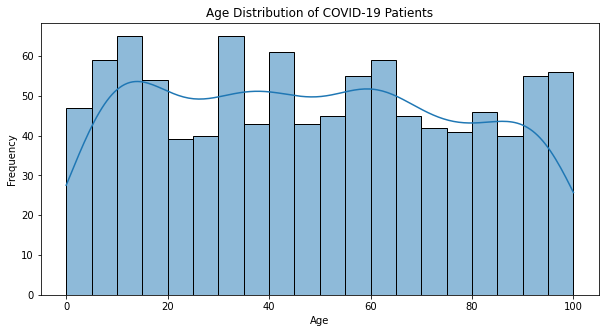

In [3]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of COVID-19 Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [4]:
# Test Results Distribution
test_results_distribution = data['TestResult'].value_counts()
print("\nTest Results Distribution:\n", test_results_distribution)




Test Results Distribution:
 Negative    501
Positive    499
Name: TestResult, dtype: int64


In [5]:
# Hospitalization and Recovery Rates
hospitalization_rate = data['Hospitalized'].mean() * 100
recovery_rate = data['Recovered'].mean() * 100
print("\nHospitalization Rate: {:.2f}%".format(hospitalization_rate))
print("Recovery Rate: {:.2f}%".format(recovery_rate))




Hospitalization Rate: 48.50%
Recovery Rate: 48.70%


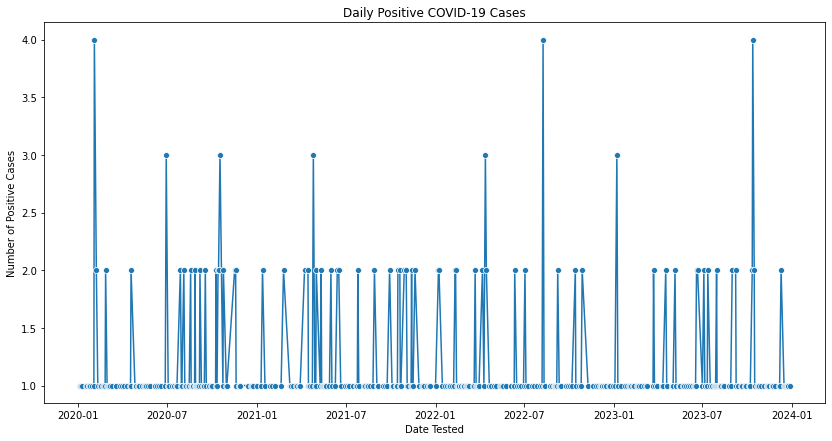

In [6]:
# Time Series Analysis of Positive Cases
positive_cases = data[data['TestResult'] == 'Positive']
positive_cases_daily = positive_cases.groupby('DateTested').size().reset_index(name='PositiveCases')

plt.figure(figsize=(14, 7))
sns.lineplot(x='DateTested', y='PositiveCases', data=positive_cases_daily, marker='o')
plt.title('Daily Positive COVID-19 Cases')
plt.xlabel('Date Tested')
plt.ylabel('Number of Positive Cases')
plt.show()



In [7]:
# Correlation Analysis
numeric_data = data[['Age', 'Hospitalized', 'Recovered']]
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)




Correlation Matrix:
                    Age  Hospitalized  Recovered
Age           1.000000      0.028897  -0.062057
Hospitalized  0.028897      1.000000  -0.016793
Recovered    -0.062057     -0.016793   1.000000


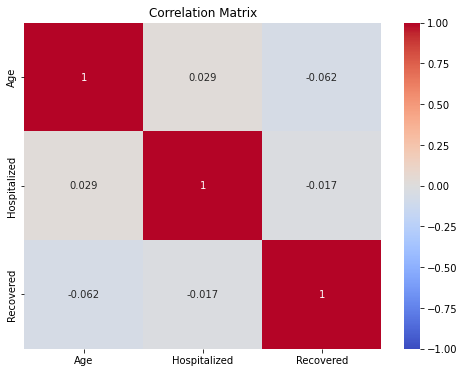

In [8]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



In [9]:
# Analysis by Gender
gender_analysis = data.groupby('Gender').agg({
    'Age': 'mean',
    'Hospitalized': 'mean',
    'Recovered': 'mean'
}).reset_index()
gender_analysis['Hospitalized'] *= 100
gender_analysis['Recovered'] *= 100

print("\nGender Analysis:\n", gender_analysis)




Gender Analysis:
    Gender        Age  Hospitalized  Recovered
0  Female  48.755814     50.581395  47.383721
1    Male  46.101493     46.567164  53.134328
2   Other  50.822430     48.286604  45.482866


In [10]:
plt.figure(figsize=(14, 7))



<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

Text(0, 0.5, 'Hospitalization Rate (%)')

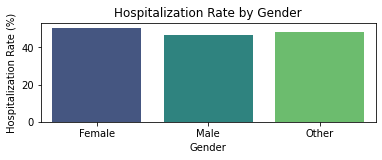

In [11]:
# Hospitalization Rate by Gender
plt.subplot(2, 1, 1)
sns.barplot(x='Gender', y='Hospitalized', data=gender_analysis, palette='viridis')
plt.title('Hospitalization Rate by Gender')
plt.ylabel('Hospitalization Rate (%)')



Text(0, 0.5, 'Recovery Rate (%)')

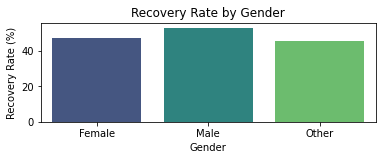

In [12]:
# Recovery Rate by Gender
plt.subplot(2, 1, 2)
sns.barplot(x='Gender', y='Recovered', data=gender_analysis, palette='viridis')
plt.title('Recovery Rate by Gender')
plt.ylabel('Recovery Rate (%)')



In [13]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>